In [1]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print("Dafault Gpu Device: {}".format(tf.test.gpu_device_name()))

else:
    print("install gpu version of tf")

Dafault Gpu Device: /device:GPU:0


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [4]:
IMAGE_SIZE = [224, 224]

train_path = r'C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set'
valid_path = r'C:/Users/prakh/Desktop/Cats and dog dataset/test_set/test_set'

In [5]:
# add preprocessing layer to the front of VGG
incv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 10s 0us/step


In [6]:
incv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [7]:
# don't train existing weights
for layer in incv3.layers:
    layer.trainable = False

In [8]:
# useful for getting number of classes
folders = glob('C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set/*')

In [9]:
folders

['C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set\\cats',
 'C:/Users/prakh/Desktop/Cats and dog dataset/training_set/training_set\\dogs']

In [11]:
x = Flatten()(incv3.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=incv3.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory(train_path ,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 8005 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2023 images belonging to 2 classes.


In [20]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
251/251 [==============================] - 269s 1s/step - loss: 0.3517 - accuracy: 0.9785 - val_loss: 0.3129 - val_accuracy: 0.9792
Epoch 2/2
251/251 [==============================] - 172s 685ms/step - loss: 0.3781 - accuracy: 0.9821 - val_loss: 0.3669 - val_accuracy: 0.9847


In [47]:
img=image.load_img("C:/Users/prakh/Desktop/Cats and dog dataset/test_set/test_set/dogs/dog.4003.jpg",target_size= (224,224))

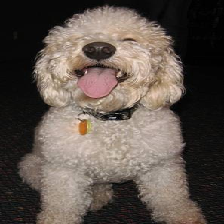

In [48]:
img

In [49]:
x = image.img_to_array(img)

In [50]:
x.shape

(224, 224, 3)

In [51]:
test_image= image.img_to_array(img)
test_image = test_image/255
test_image =np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

In [52]:
test_image.shape

(1, 224, 224, 3)

In [53]:
result   

array([[1.1002932e-31, 1.0000000e+00]], dtype=float32)

In [54]:
a = np.argmax(model.predict(test_image))

In [55]:
a

1